In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('health care diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking the number of rows and columns of the dataset
data.shape

(768, 9)

In [5]:
#dataset information overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Summary Statistics for the Diabetics Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['BloodPressure'].mean()

69.10546875

In [8]:
#Identifying the mean of the features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [9]:
#Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [10]:
#Finding the null value percentage
selected_columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage=(data[selected_columns]==0).mean()*100
#Displaying the null value percentage for each selected colunn
print("Percentage of Null values for Each Column:")
print(null_percentage)

Percentage of Null values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [11]:
#Preplacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])
data['BMI']=data['BMI'].replace([0],[data['BMI'].mean()])

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#Finding the null value percentage
selected_columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage=(data[selected_columns]==0).mean()*100
#Displaying the null value percentage for each selected colunn
print("Percentage of Null values for Each Column:")
print(null_percentage)

Percentage of Null values for Each Column:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [14]:
## Detecting Outliers and Treatment
columns=data[selected_columns]
type(columns)

pandas.core.frame.DataFrame

In [15]:
columns.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'], dtype='object')

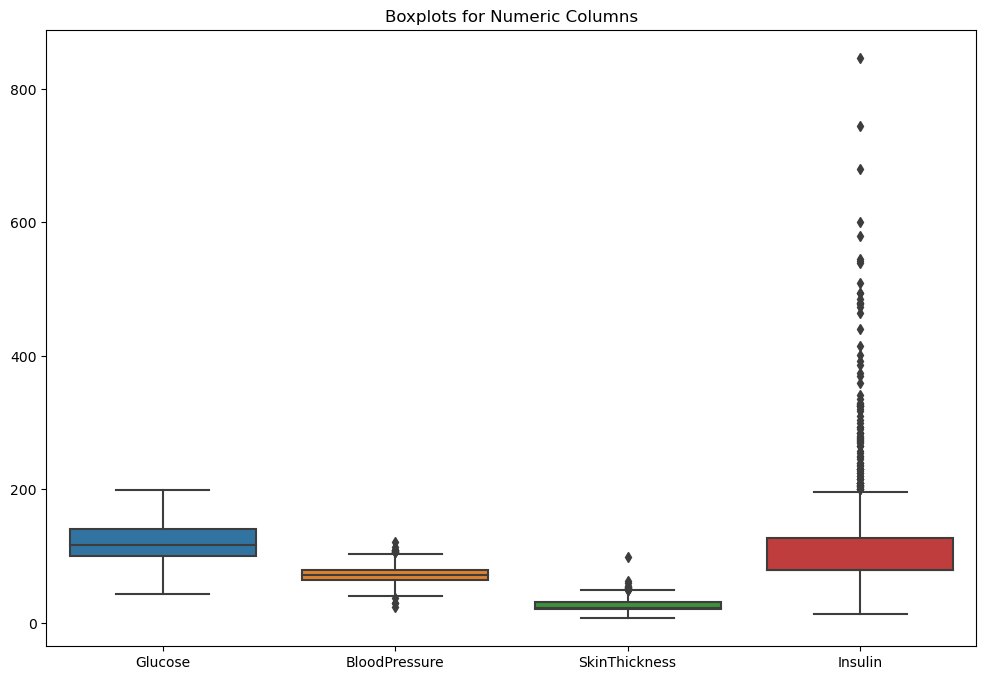

In [16]:
#Display boxplots for numeric columns to visulaize outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [17]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
 
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
 
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
 
    # Count the number of outliers
    count_outliers = len(outliers)
 
    return count_outliers
 
# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


In [18]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [19]:
data_cleared_iqr=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [20]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

In [22]:
type(col)

pandas.core.frame.DataFrame

In [23]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479


In [24]:
col.shape

(688, 4)

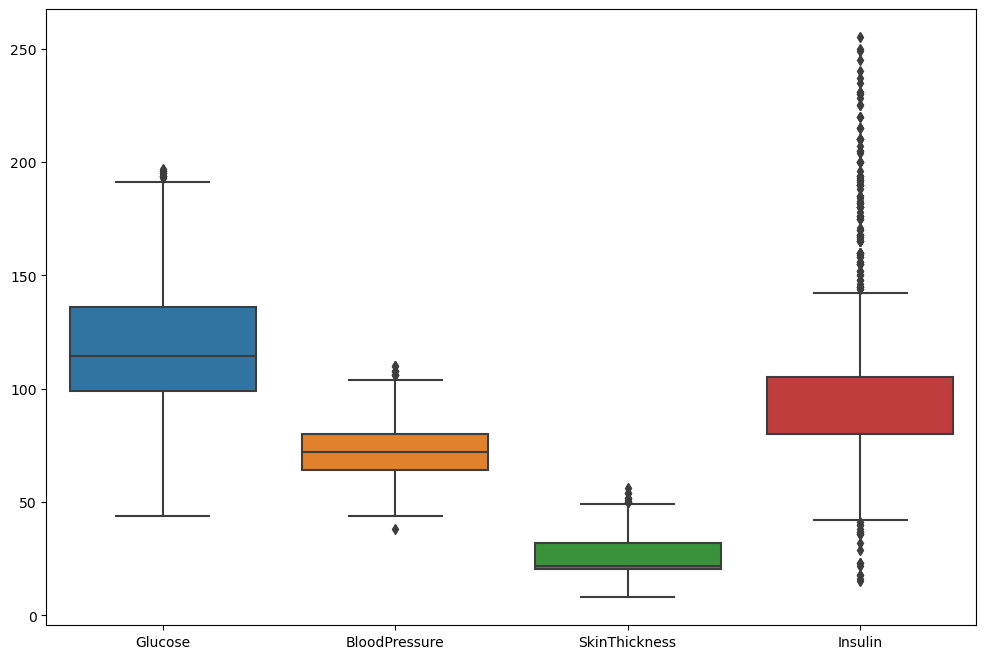

In [25]:
#checking the outliers after treatment using box plot
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

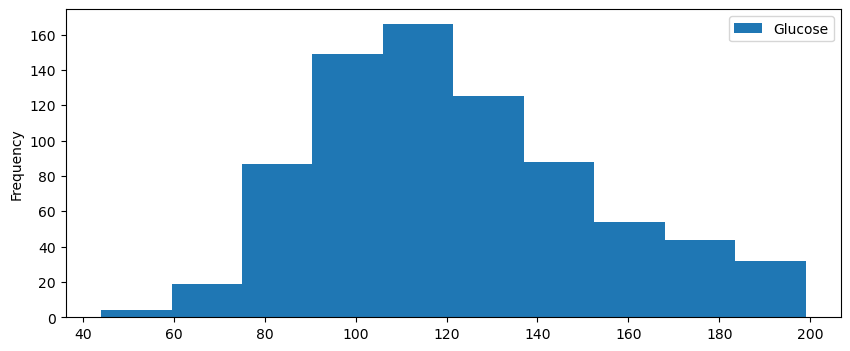

In [26]:
data['Glucose'].plot(kind='hist',figsize=(10,4))
plt.legend()
plt.show()

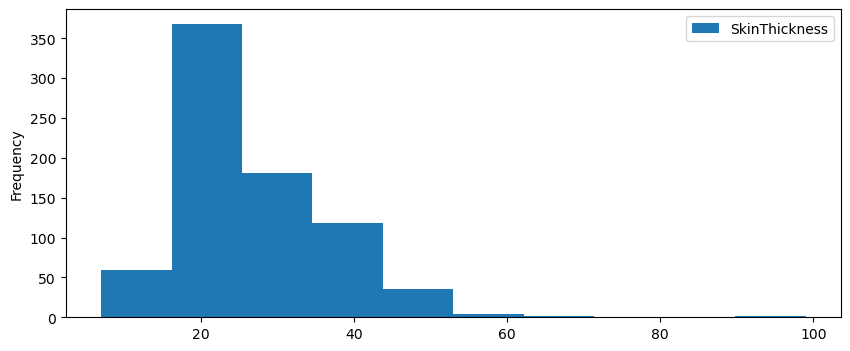

In [27]:
data['SkinThickness'].plot(kind='hist',figsize=(10,4))
plt.legend()
plt.show()

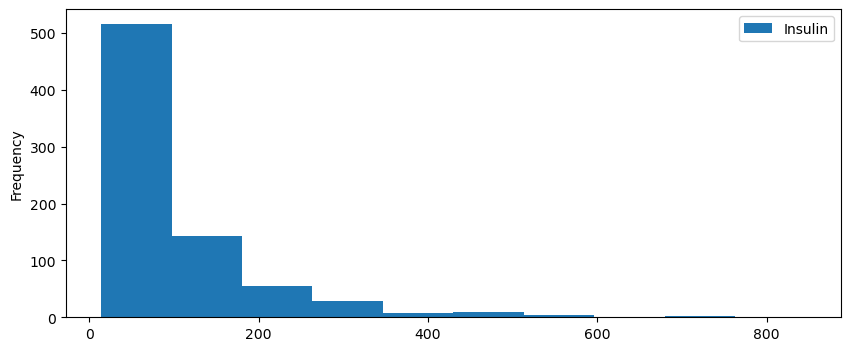

In [28]:
data['Insulin'].plot(kind='hist',figsize=(10,4))
plt.legend()
plt.show()

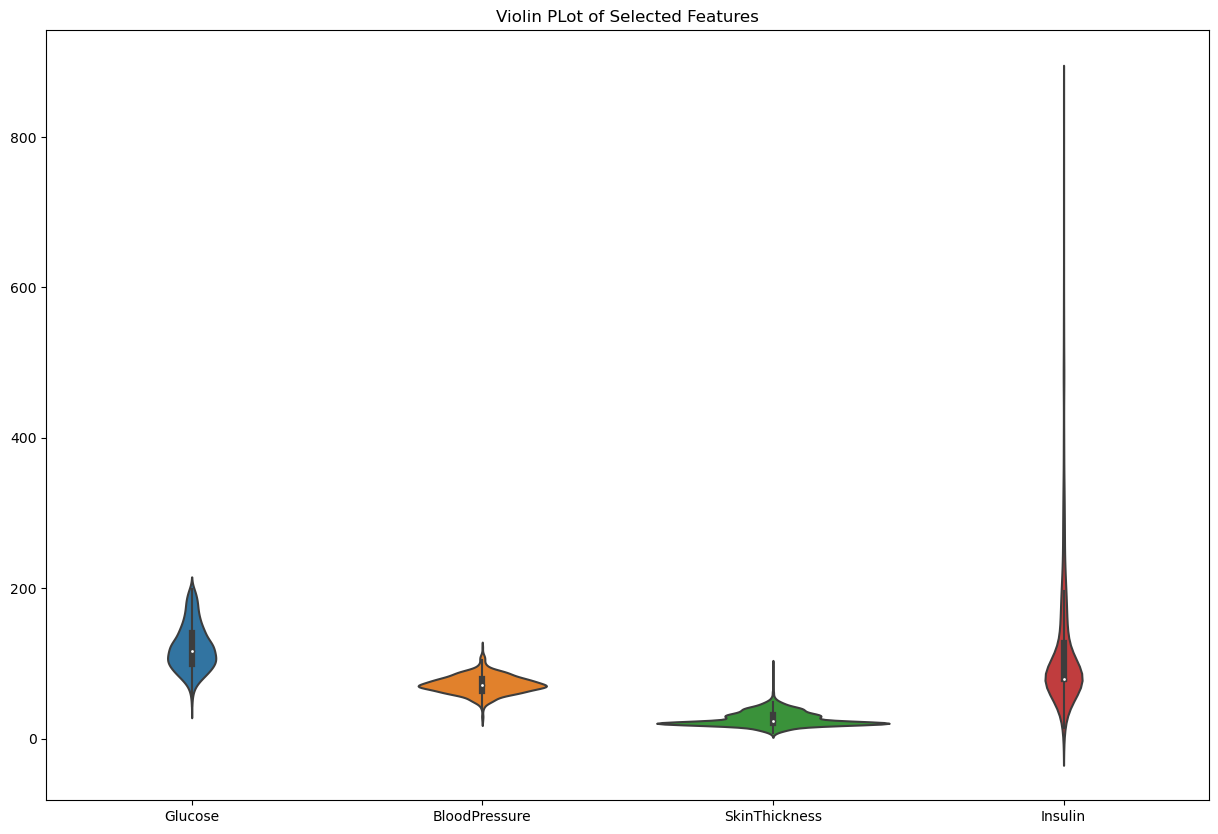

In [29]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin PLot of Selected Features")
plt.show()

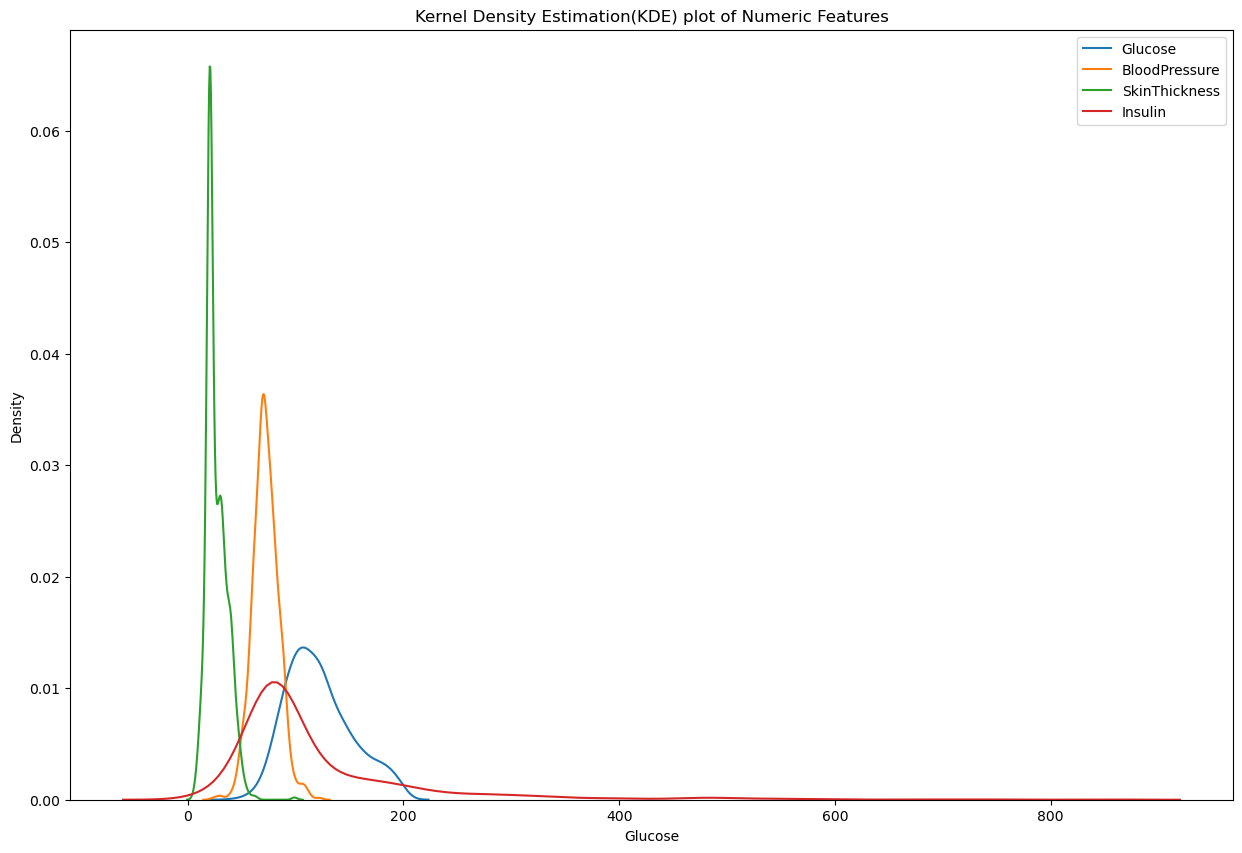

In [30]:
#Kernel Density Distribution Plot
plt.figure(figsize=(15,10))
for column in selected_columns:
    sns.kdeplot(data[column],label=column)
plt.title("Kernel Density Estimation(KDE) plot of Numeric Features")
plt.legend()
plt.show()        

In [31]:
#Creating a count(frequency) plot describing the data types and the count of variables
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

In [33]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

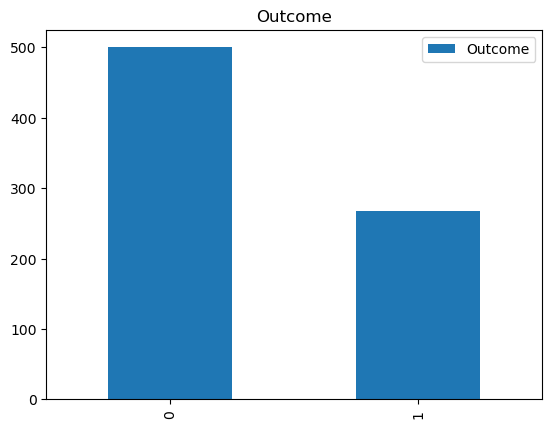

In [34]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [35]:
data['Outcome'].value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [36]:
Outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
Outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [37]:
balanced_data=100-Outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

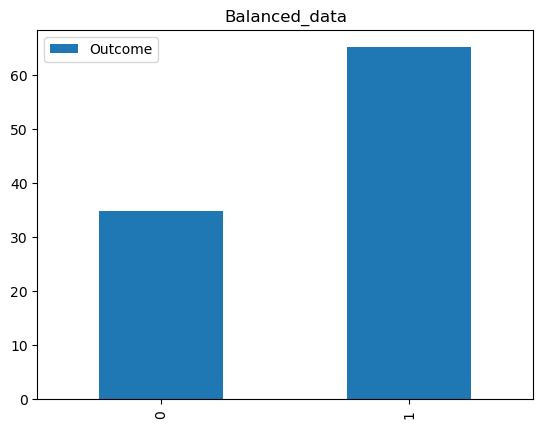

In [38]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

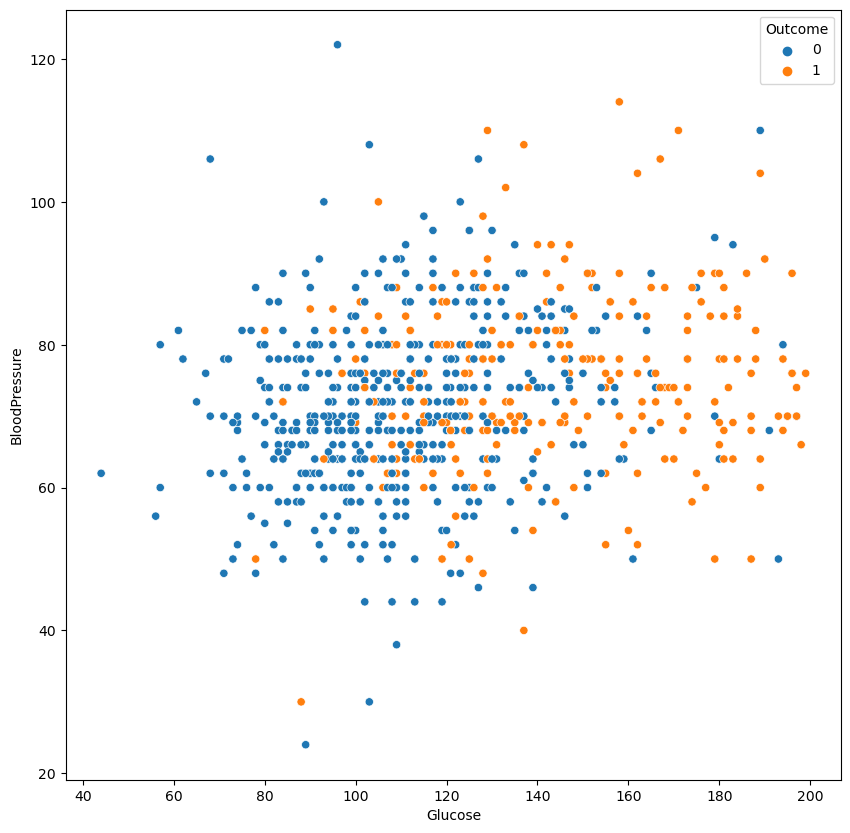

In [39]:
#Bi-variate Analysis
plt.figure(figsize=(10,10))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

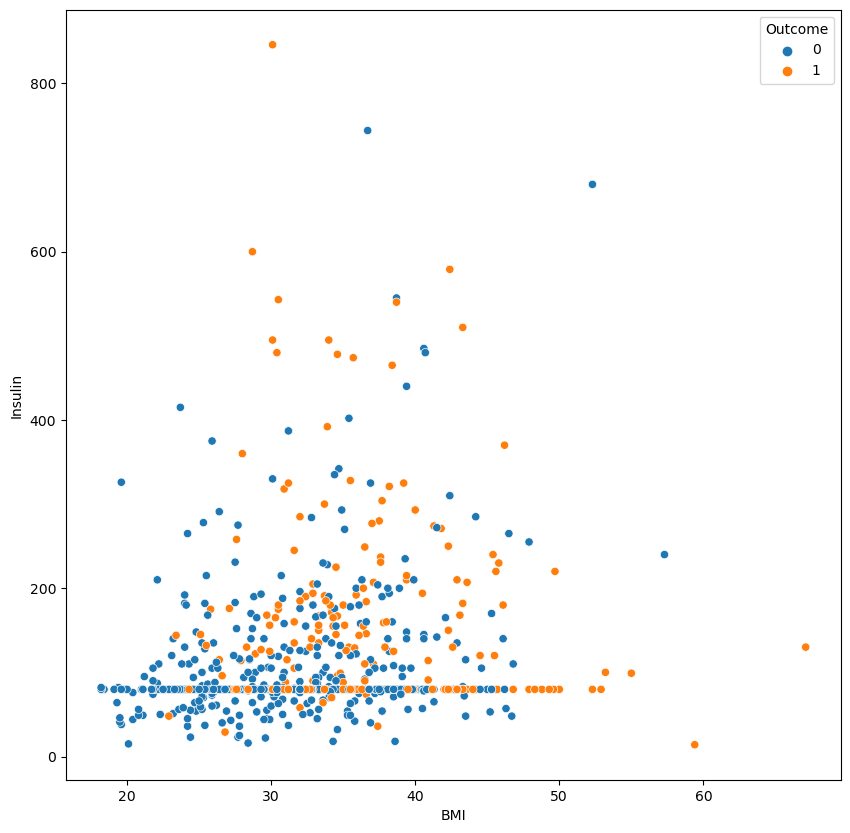

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

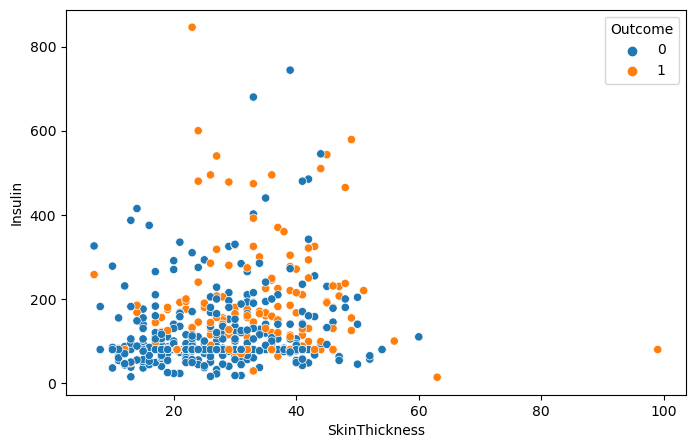

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

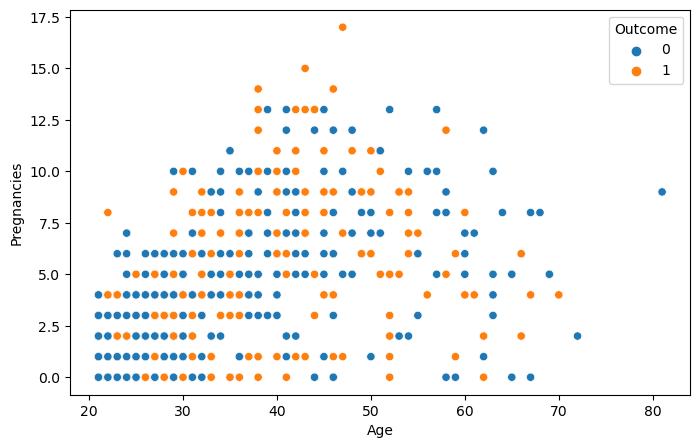

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

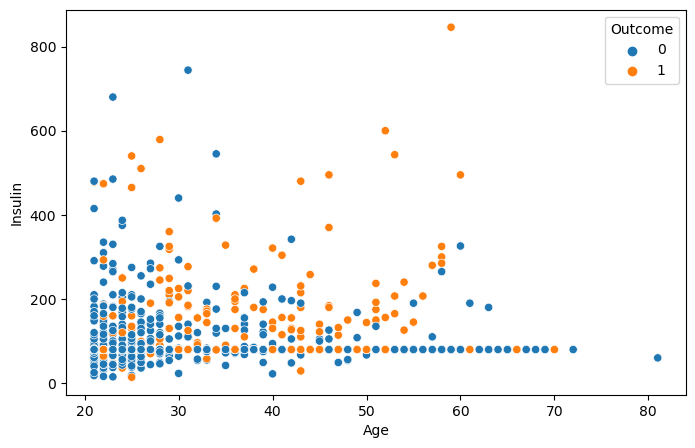

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Insulin',hue='Outcome',data=data)
plt.show()

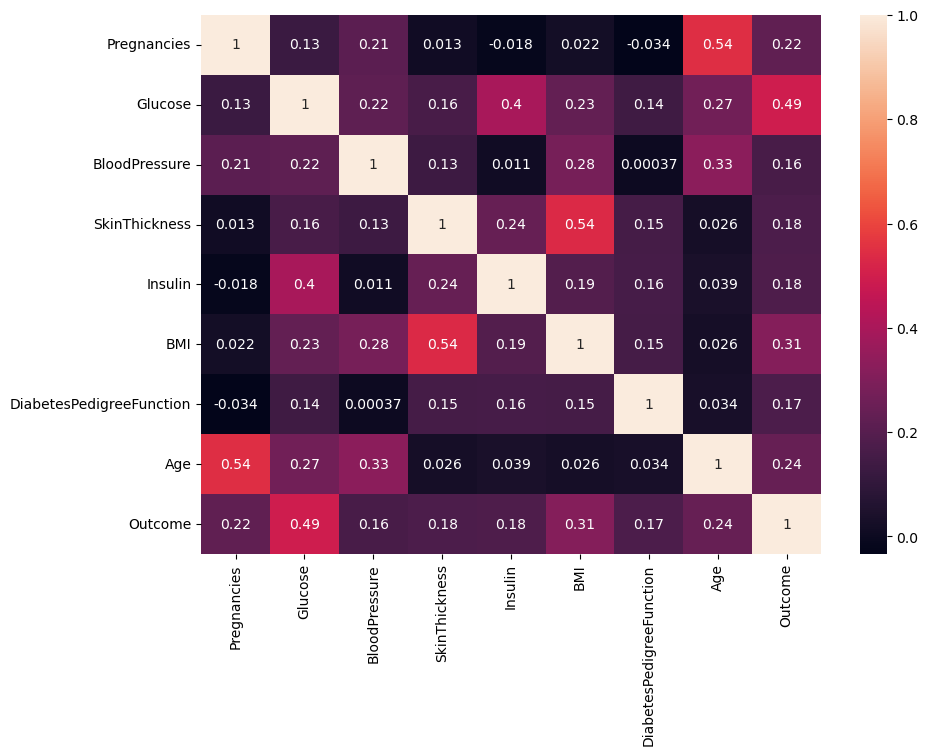

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [45]:
#separating the data and labels
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']

In [46]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [47]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [49]:
# Data Standardization
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [51]:
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [52]:
X=standardized_data
Y=data['Outcome']

In [53]:
print(X)
print(Y)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [54]:
#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [57]:
#Training the Model
from sklearn import svm
classifier=svm.SVC(kernel='linear')

In [58]:
# Training the support vector machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [60]:
# Model Evaluation
#Accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [61]:
print('Accuracy Score of the Training data:',training_data_accuracy)

Accuracy Score of the Training data: 0.7801302931596091


In [62]:
#Accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [63]:
print('Accuracy Score of the Test data:',test_data_accuracy)

Accuracy Score of the Test data: 0.7792207792207793


In [67]:
# Making a Predictive system
# 0 ----> Non-Diabetic
# 1 ----> Diabetic
input_data=(1,103,30,38,83,43.3,0.183,33)

#changing the input data to numpy-array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('The Person is not diabetic')
else:
    print('The person is diabetic')

[[-0.84488505 -0.6141993  -3.48981362  1.18374631 -0.38336125  1.57900731
  -0.87244072 -0.0204964 ]]
[0]
The Person is not diabetic


C:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
